In [100]:
import pandas as pd
import numpy as np
import csv
import copy

In [113]:
#2010-2012

survey_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/survey_activity.csv', encoding = "ISO-8859-1")
obd_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/obd_gpstrips.csv', encoding = "ISO-8859-1")
vgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")
wgps_trips = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_2010_2012/caltrans_full_survey/w_gpstrips.csv', encoding = "ISO-8859-1")

/Users/david/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
vgps_trips_2012 = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_Supplement_2012/caltrans_scag_full_survey/v_gpstrips.csv', encoding = "ISO-8859-1")
wgps_trips_2012 = pd.read_csv('desktop/Caltrans/California_Household_Travel_Survey_Supplement_2012/caltrans_scag_full_survey/w_gpstrips.csv', encoding = "ISO-8859-1")

In [116]:
vgps_trips_2012.head()

,sampno,vehno,gpstripid,distance_miles,duration_sec,avg_speed_mph,start_time,end_time,origin_lon,origin_lat,destination_lon,destination_lat
0,1105358,1,1,4.654061,590,28.397659,5/20/2012 11:45,5/20/2012 11:55,redacted,redacted,redacted,redacted
1,1105358,1,2,1.414819,356,14.307157,5/20/2012 12:02,5/20/2012 12:08,redacted,redacted,redacted,redacted
2,1105358,1,3,0.198523,87,8.214755,5/20/2012 12:41,5/20/2012 12:42,redacted,redacted,redacted,redacted
3,1105358,1,4,1.426983,283,18.152429,5/20/2012 13:22,5/20/2012 13:27,redacted,redacted,redacted,redacted
4,1105358,1,5,8.001976,1193,24.146783,5/20/2012 13:39,5/20/2012 13:59,redacted,redacted,redacted,redacted


In [118]:
#========================= wgps_2012 ==================================
#get columns you want
wgps_df_2012 = wgps_trips_2012[["sampno", 'end_time']]

#split "end_time" into two columns
wgps_end_time_2012 = wgps_df_2012['end_time']
split_wgps_end_time_2012 = wgps_end_time_2012.str.split(pat=None, n=-1, expand=True)

#rename split columns
split_wgps_end_time_2012.columns = ['travel_date', 'arr_time']

#now add renamed columns to dataFrame

#make copy
wgps_df_f_2012 = wgps_df_2012.copy(deep=True)

#first remove end_time
wgps_df_f_2012.drop('end_time', axis=1, inplace=True)

#now add split & renamed columns
wgps_df_f2_2012 = pd.concat([wgps_df_f_2012, split_wgps_end_time_2012], axis=1)

#change to date time and add "day_of_week" columns
wgps_df_f3_2012 = wgps_df_f2_2012.copy(deep=True)
wgps_df_f3_2012['travel_date'] = pd.to_datetime(wgps_df_f3_2012['travel_date'])
wgps_df_f3_2012['day_of_week'] = wgps_df_f3_2012['travel_date'].dt.weekday_name

#add hours and minutes
wgps_df_f3_2012['start_hour'] = pd.to_datetime(wgps_df_f3_2012['arr_time'], format='%H:%M').dt.hour
wgps_df_f3_2012['start_minute'] = pd.to_datetime(wgps_df_f3_2012['arr_time'], format='%H:%M').dt.minute

wgps_df_final_2012 = wgps_df_f3_2012.copy(deep=True)
wgps_df_final_2012.head()


,sampno,travel_date,arr_time,day_of_week,start_hour,start_minute
0,2104353,2012-05-26,18:36,Saturday,18,36
1,2104353,2012-05-26,19:18,Saturday,19,18
2,2104353,2012-05-26,19:26,Saturday,19,26
3,2104353,2012-05-26,19:41,Saturday,19,41
4,2104353,2012-05-26,19:51,Saturday,19,51


In [119]:
#========================= vgps_2012 ==================================
#get columns you want
vgps_df_2012 = vgps_trips_2012[["sampno", 'end_time']]

#split "end_time" into two columns
vgps_end_time_2012 = vgps_df_2012['end_time']
split_vgps_end_time_2012 = vgps_end_time_2012.str.split(pat=None, n=-1, expand=True)

#rename split columns
split_vgps_end_time_2012.columns = ['travel_date', 'arr_time']

#now add renamed columns to dataFrame

#make copy
vgps_df_f_2012 = vgps_df_2012.copy(deep=True)

#first remove end_time
vgps_df_f_2012.drop('end_time', axis=1, inplace=True)

#now add split & renamed columns
vgps_df_f2_2012 = pd.concat([vgps_df_f_2012, split_vgps_end_time_2012], axis=1)

#change to date time and add "day_of_week" columns
vgps_df_f3_2012 = vgps_df_f2_2012.copy(deep=True)
vgps_df_f3_2012['travel_date'] = pd.to_datetime(vgps_df_f3_2012['travel_date'])
vgps_df_f3_2012['day_of_week'] = vgps_df_f3_2012['travel_date'].dt.weekday_name

#add hours and minutes
vgps_df_f3_2012['start_hour'] = pd.to_datetime(vgps_df_f3_2012['arr_time'], format='%H:%M').dt.hour
vgps_df_f3_2012['start_minute'] = pd.to_datetime(vgps_df_f3_2012['arr_time'], format='%H:%M').dt.minute

vgps_df_final_2012 = vgps_df_f3_2012.copy(deep=True)
vgps_df_final_2012.head()


,sampno,travel_date,arr_time,day_of_week,start_hour,start_minute
0,1105358,2012-05-20,11:55,Sunday,11,55
1,1105358,2012-05-20,12:08,Sunday,12,8
2,1105358,2012-05-20,12:42,Sunday,12,42
3,1105358,2012-05-20,13:27,Sunday,13,27
4,1105358,2012-05-20,13:59,Sunday,13,59


In [109]:
#========================= SURVEY ==================================

In [7]:
#SURVEY
survey_trips.head()
survey_df = survey_trips[['sampno','travel_date','arr_time']]
survey_df.head()

,sampno,travel_date,arr_time
0,1039879,2012-06-24,03:00:00
1,1041766,2012-05-01,03:00:00
2,1043722,2012-07-03,18:50:00
3,1050668,2012-05-04,08:00:00
4,1051203,2012-05-07,18:16:00


In [51]:
#check data types
survey_df.dtypes

#change travel date
survey_df_2 = survey_df.copy(deep=True)
survey_df_2['travel_date'] = pd.to_datetime(survey_df_2['travel_date'])
survey_df_2['day_of_week'] = survey_df_2['travel_date'].dt.weekday_name

#add travel time
survey_df_2['start_hour'] = pd.to_datetime(survey_df_2['arr_time'], format='%H:%M:%S').dt.hour
survey_df_2['start_minute'] = pd.to_datetime(survey_df_2['arr_time'], format='%H:%M:%S').dt.minute

survey_df_final = survey_df_2.copy(deep=True)
survey_df_final.head()


,sampno,travel_date,arr_time,day_of_week,start_hour,start_minute
0,1039879,2012-06-24,03:00:00,Sunday,3,0
1,1041766,2012-05-01,03:00:00,Tuesday,3,0
2,1043722,2012-07-03,18:50:00,Tuesday,18,50
3,1050668,2012-05-04,08:00:00,Friday,8,0
4,1051203,2012-05-07,18:16:00,Monday,18,16


In [ ]:
#========================= OBD ==================================

In [32]:
#get columns you want
obd_trips.head()
obd_df = obd_trips[["sampno", 'end_time']]

#split "end_time" into two columns
obd_end_time = obd_df['end_time']
split_obd_end_time = obd_end_time.str.split(pat=None, n=-1, expand=True)

#rename split columns
split_obd_end_time.columns = ['travel_date', 'arr_time']
split_obd_end_time.head()
#print(split_obd_end_time.shape)


,travel_date,arr_time
0,2012-10-27,14:05:59
1,2012-10-19,16:15:52
2,2012-10-13,11:55:46
3,2012-08-14,21:40:43
4,2012-07-09,08:43:31


In [37]:

#now add renamed columns to dataFrame

#make copy
obd_df_f = obd_df.copy(deep=True)
obd_df_f.head()
#print(obd_df_f.shape)

#first remove end_time
obd_df_f.drop('end_time', axis=1, inplace=True)

#now add split & renamed columns
obd_df_f2 = pd.concat([obd_df_f, split_obd_end_time], axis=1)

obd_df_f2.head()


,sampno,travel_date,arr_time
0,2398459,2012-10-27,14:05:59
1,2527393,2012-10-19,16:15:52
2,2536174,2012-10-13,11:55:46
3,2417842,2012-08-14,21:40:43
4,2420150,2012-07-09,08:43:31


In [38]:
obd_df_f2.dtypes

sampno          int64
travel_date    object
arr_time       object
dtype: object

In [45]:
obd_df_f3 = obd_df_f2.copy(deep=True)
obd_df_f3['travel_date'] = pd.to_datetime(obd_df_f3['travel_date'])
obd_df_f3['day_of_week'] = obd_df_f3['travel_date'].dt.weekday_name

obd_df_f3.head()

,sampno,travel_date,arr_time,day_of_week
0,2398459,2012-10-27,14:05:59,Saturday
1,2527393,2012-10-19,16:15:52,Friday
2,2536174,2012-10-13,11:55:46,Saturday
3,2417842,2012-08-14,21:40:43,Tuesday
4,2420150,2012-07-09,08:43:31,Monday


In [48]:
obd_df_f3['start_hour'] = pd.to_datetime(obd_df_f3['arr_time'], format='%H:%M:%S').dt.hour
obd_df_f3['start_minute'] = pd.to_datetime(obd_df_f3['arr_time'], format='%H:%M:%S').dt.minute

obd_df_final = obd_df_f3.copy(deep=True)
obd_df_final.head()

,sampno,travel_date,arr_time,day_of_week,start_hour,start_minute
0,2398459,2012-10-27,14:05:59,Saturday,14,5
1,2527393,2012-10-19,16:15:52,Friday,16,15
2,2536174,2012-10-13,11:55:46,Saturday,11,55
3,2417842,2012-08-14,21:40:43,Tuesday,21,40
4,2420150,2012-07-09,08:43:31,Monday,8,43


In [52]:
#========================= vGPS ==================================


In [59]:
#get columns you want
vgps_df = vgps_trips[["sampno", 'end_time']]

#split "end_time" into two columns
vgps_end_time = vgps_df['end_time']
split_vgps_end_time = vgps_end_time.str.split(pat=None, n=-1, expand=True)

#rename split columns
split_vgps_end_time.columns = ['travel_date', 'arr_time']

#now add renamed columns to dataFrame

#make copy
vgps_df_f = vgps_df.copy(deep=True)

#first remove end_time
vgps_df_f.drop('end_time', axis=1, inplace=True)

#now add split & renamed columns
vgps_df_f2 = pd.concat([vgps_df_f, split_vgps_end_time], axis=1)

#change to date time and add "day_of_week" columns
vgps_df_f3 = vgps_df_f2.copy(deep=True)
vgps_df_f3['travel_date'] = pd.to_datetime(vgps_df_f3['travel_date'])
vgps_df_f3['day_of_week'] = vgps_df_f3['travel_date'].dt.weekday_name

#add hours and minutes
vgps_df_f3['start_hour'] = pd.to_datetime(vgps_df_f3['arr_time'], format='%H:%M:%S').dt.hour
vgps_df_f3['start_minute'] = pd.to_datetime(vgps_df_f3['arr_time'], format='%H:%M:%S').dt.minute

vgps_df_final = vgps_df_f3.copy(deep=True)
vgps_df_final.head()


,sampno,travel_date,arr_time,day_of_week,start_hour,start_minute
0,1776019,2012-09-24,07:58:04,Monday,7,58
1,2759536,2012-12-09,21:23:58,Sunday,21,23
2,2055542,2012-07-24,08:50:32,Tuesday,8,50
3,2556033,2012-10-12,17:18:15,Friday,17,18
4,2759536,2012-12-11,18:12:42,Tuesday,18,12


In [60]:
#========================= wGPS ==================================


In [61]:
#get columns you want
wgps_df = wgps_trips[["sampno", 'end_time']]

#split "end_time" into two columns
wgps_end_time = wgps_df['end_time']
split_wgps_end_time = wgps_end_time.str.split(pat=None, n=-1, expand=True)

#rename split columns
split_wgps_end_time.columns = ['travel_date', 'arr_time']

#now add renamed columns to dataFrame

#make copy
wgps_df_f = wgps_df.copy(deep=True)

#first remove end_time
wgps_df_f.drop('end_time', axis=1, inplace=True)

#now add split & renamed columns
wgps_df_f2 = pd.concat([wgps_df_f, split_wgps_end_time], axis=1)

#change to date time and add "day_of_week" columns
wgps_df_f3 = wgps_df_f2.copy(deep=True)
wgps_df_f3['travel_date'] = pd.to_datetime(wgps_df_f3['travel_date'])
wgps_df_f3['day_of_week'] = wgps_df_f3['travel_date'].dt.weekday_name

#add hours and minutes
wgps_df_f3['start_hour'] = pd.to_datetime(wgps_df_f3['arr_time'], format='%H:%M:%S').dt.hour
wgps_df_f3['start_minute'] = pd.to_datetime(wgps_df_f3['arr_time'], format='%H:%M:%S').dt.minute

wgps_df_final = wgps_df_f3.copy(deep=True)
wgps_df_final.head()


,sampno,travel_date,arr_time,day_of_week,start_hour,start_minute
0,1043613,2012-05-18,09:17:40,Friday,9,17
1,1043613,2012-05-18,09:29:32,Friday,9,29
2,1043613,2012-05-18,11:53:02,Friday,11,53
3,1055449,2012-07-18,14:58:19,Wednesday,14,58
4,1043613,2012-05-18,17:57:22,Friday,17,57


In [62]:
# NOW APPEND ALL THE DATA FRAMES TOGETHER


In [120]:
finalDf = pd.concat([survey_df_final,obd_df_final, vgps_df_final,wgps_df_final, vgps_df_final_2012, wgps_df_final_2012])
finalDf.shape

(823866, 6)

In [ ]:
# Counts of Day of Week

In [121]:
dayOfWeekSeries = finalDf["day_of_week"]

dayOfWeekCounts = dayOfWeekSeries.value_counts()
dayOfWeekCounts

Thursday     149415
Wednesday    136928
Friday       128804
Tuesday      125996
Saturday     100455
Monday        95804
Sunday        86440
Name: day_of_week, dtype: int64

In [71]:
#Counts of Time Bins

In [122]:
#0
zerohr_first = finalDf[(finalDf.start_hour < 1) & (finalDf.start_minute < 30)]
print("Trips between 0:00 -- 0:29 : ", zerohr_first.shape[0])

zerohr_second = finalDf[(finalDf.start_hour < 1) & (finalDf.start_minute > 29)]
print("Trips between 0:30 -- 0:59 : ", zerohr_second.shape[0])

#1
onehr_first = finalDf[(finalDf.start_hour > 0) & (finalDf.start_hour < 2) & (finalDf.start_minute < 30)]
print("Trips between 1:00 -- 1:29 : ", onehr_first.shape[0])

onehr_second = finalDf[(finalDf.start_hour > 0) & (finalDf.start_hour < 2) & (finalDf.start_minute > 29)]
print("Trips between 1:30 -- 1:59 : ", onehr_second.shape[0])

#2
twohr_first = finalDf[(finalDf.start_hour > 1) & (finalDf.start_hour < 3) & (finalDf.start_minute < 30)]
print("Trips between 2:00 -- 2:29 : ", twohr_first.shape[0])

twohr_second = finalDf[(finalDf.start_hour > 1) & (finalDf.start_hour < 3) & (finalDf.start_minute > 29)]
print("Trips between 2:30 -- 2:59 : ", twohr_second.shape[0])

#3
threehr_first = finalDf[(finalDf.start_hour > 2) & (finalDf.start_hour < 4) & (finalDf.start_minute < 30)]
print("Trips between 3:00 -- 3:29 : ", threehr_first.shape[0])

threehr_second = finalDf[(finalDf.start_hour > 2) & (finalDf.start_hour < 4) & (finalDf.start_minute > 29)]
print("Trips between 3:30 -- 3:59 : ", threehr_second.shape[0])

#24th
hr_first = finalDf[(finalDf.start_hour > 22) & (finalDf.start_hour < 24) & (finalDf.start_minute < 30)]
print("Trips between 23:00 -- 23:29 : ", hr_first.shape[0])

hr_second = finalDf[(finalDf.start_hour > 22) & (finalDf.start_hour < 24) & (finalDf.start_minute > 29)]
print("Trips between 23:30 -- 23:59 : ", hr_second.shape[0])


Trips between 0:00 -- 0:29 :  1544
Trips between 0:30 -- 0:59 :  883
Trips between 1:00 -- 1:29 :  738
Trips between 1:30 -- 1:59 :  543
Trips between 2:00 -- 2:29 :  444
Trips between 2:30 -- 2:59 :  392
Trips between 3:00 -- 3:29 :  109701
Trips between 3:30 -- 3:59 :  422
Trips between 23:00 -- 23:29 :  3559
Trips between 23:30 -- 23:59 :  2229


In [124]:
#Write a function to compute counts
#inputs: data
#ouput list of counts

holder = []
i = 0

for hour in range(24):
    for half in range(2):
        
        if half == 0:
            df = finalDf[(finalDf.start_hour > hour-1) & (finalDf.start_hour < hour+1) & (finalDf.start_minute < 30)]
            count = df.shape[0]
            
        else:
            df = finalDf[(finalDf.start_hour > hour-1) & (finalDf.start_hour < hour+1) & (finalDf.start_minute > 29)]
            count = df.shape[0]
        
        holder.append(count)
        
holder

[1544,
 883,
 738,
 543,
 444,
 392,
 109701,
 422,
 748,
 1250,
 2795,
 4241,
 8755,
 11872,
 21153,
 26619,
 30755,
 22440,
 23857,
 18729,
 21619,
 18223,
 21634,
 22196,
 28462,
 24634,
 25171,
 21351,
 23687,
 23514,
 27070,
 24163,
 25702,
 23462,
 28678,
 26570,
 28897,
 23077,
 22033,
 16339,
 14466,
 11048,
 10300,
 7316,
 6384,
 4201,
 3559,
 2229]

In [77]:
half_hour_counts = pd.Series(holder, index=["0:00-0:29","0:30-0:59","1:00-1:29","1:30-1:59","2:00-2:29","2:30-2:59","3:00-3:29","3:30-3:59","4:00-4:29","4:30-4:59","5:00-5:29","5:30-5:59","6:00-6:29","6:30-6:59","7:00-7:29","7:30-7:59","8:00-8:29","8:30-8:59","9:00-9:29","9:30-9:59","10:00-10:29","10:30-10:59","11:00-11:29","11:30-11:59","12:00-12:29","12:30-12:59","13:00-13:29","13:30-13:59","14:00-14:29","14:30-14:59","15:00-15:29","15:30-15:59","16:00-16:29","16:30-16:59","17:00-17:29","17:30-17:59","18:00-18:29","18:30-18:59","19:00-19:29","19:30-19:59","20:00-20:29","20:30-20:59","21:00-21:29","21:30-21:59","22:00-22:29","22:30-22:59","23:00-23:29","23:30-23:59"])
half_hour_counts

0:00-0:29        1494
0:30-0:59         846
1:00-1:29         709
1:30-1:59         530
2:00-2:29         428
2:30-2:59         372
3:00-3:29      109687
3:30-3:59         402
4:00-4:29         732
4:30-4:59        1222
5:00-5:29        2742
5:30-5:59        4176
6:00-6:29        8665
6:30-6:59       11725
7:00-7:29       20902
7:30-7:59       26265
8:00-8:29       30401
8:30-8:59       21970
9:00-9:29       23456
9:30-9:59       18302
10:00-10:29     21170
10:30-10:59     17738
11:00-11:29     21144
11:30-11:59     21657
12:00-12:29     27911
12:30-12:59     24011
13:00-13:29     24614
13:30-13:59     20817
14:00-14:29     23149
14:30-14:59     22934
15:00-15:29     26493
15:30-15:59     23661
16:00-16:29     25168
16:30-16:59     22974
17:00-17:29     28137
17:30-17:59     26068
18:00-18:29     28353
18:30-18:59     22603
19:00-19:29     21614
19:30-19:59     16010
20:00-20:29     14134
20:30-20:59     10799
21:00-21:29     10062
21:30-21:59      7142
22:00-22:29      6227
22:30-22:5

In [78]:
# ------------------ DISTRIBUTIONS --------------------

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

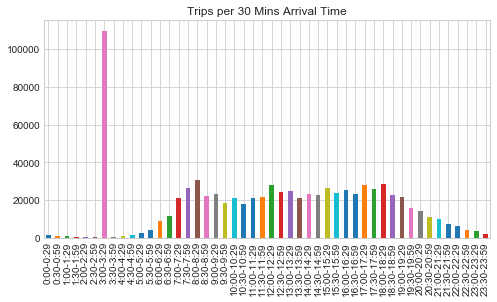

In [132]:
half_hour_plot = half_hour_counts.plot(kind='bar', title="Trips per 30 Mins Arrival Time", figsize=(8,4))
#outlier caused by 2010-2012 survey activity

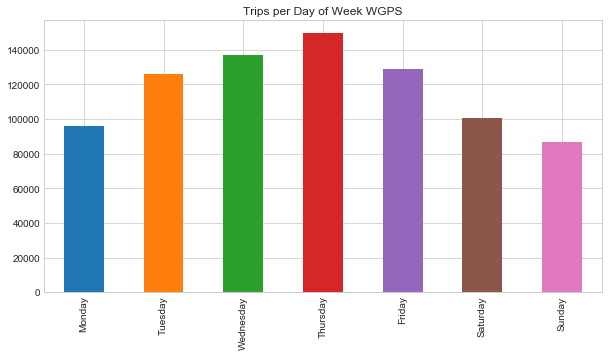

In [134]:
week = pd.Series([95804,125996,136928,149415,128804,100455,86440], index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
week

day_of_week_plot = week.plot(kind='bar', title="Trips per Day of Week WGPS", figsize=(10,5))